<a href="https://colab.research.google.com/github/kashvi-sharma/M-achine-Learning/blob/main/mall%20customers%20(kmeans%20clustering)%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("https://raw.githubusercontent.com/ffzs/dataset/master/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
x=df["Annual Income (k$)"]
y=df["Spending Score (1-100)"]
print("shape: ",x.shape,"dimension",x.ndim)
print("shape: ",y.shape,"dimension",y.ndim)


shape:  (200,) dimension 1
shape:  (200,) dimension 1


In [4]:
df.drop(["Gender","CustomerID","Age"],axis=1)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x.reshape(-1, 1),y,test_size=0.3,random_state=42) # Removed .values since x is already a NumPy array
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
prediction=model.predict(x_test)
prediction

array([46, 77, 73, 55, 55, 46, 46, 55, 55, 73, 46, 16, 55, 46, 16, 55, 46,
       55, 46, 46, 55, 77, 55, 46, 46, 46, 46, 46, 55, 55, 77, 73, 46, 46,
       55, 46, 55, 55, 55, 46, 46, 83, 73, 73, 55, 83, 73, 73, 55, 46, 46,
       55, 77, 55, 46, 46, 55, 46, 55, 46])

In [9]:
model.predict([[10]])

array([6])

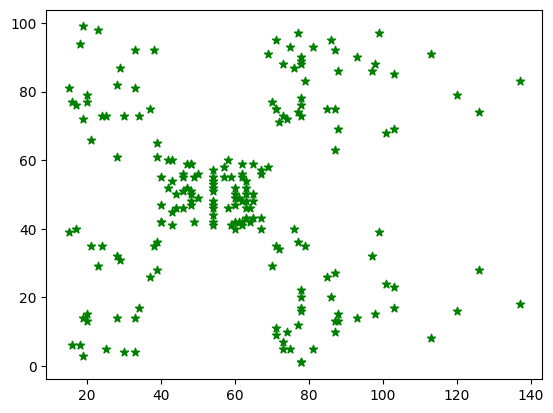

In [12]:
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"],marker="*",color="green")

<ipython-input-13-2b8341ef89cc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Annual Income (k$)"])


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

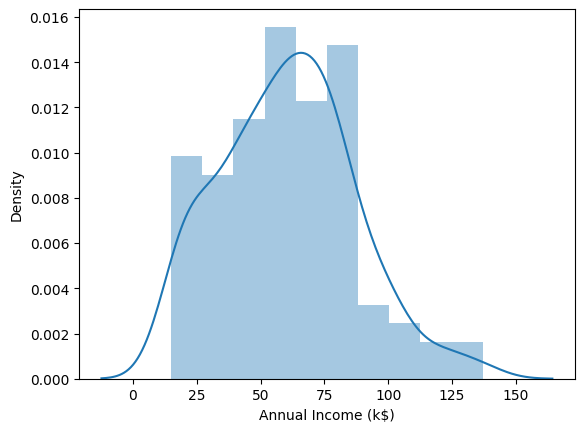

In [13]:
sns.distplot(df["Annual Income (k$)"])

<ipython-input-14-6d6be9b41838>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Spending Score (1-100)"])


<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

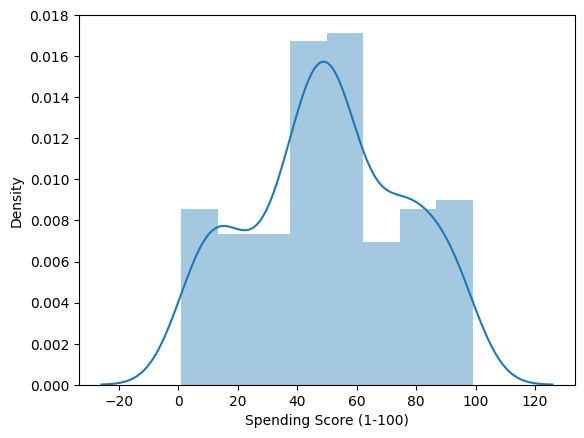

In [14]:
sns.distplot(df["Spending Score (1-100)"])

<Axes: >

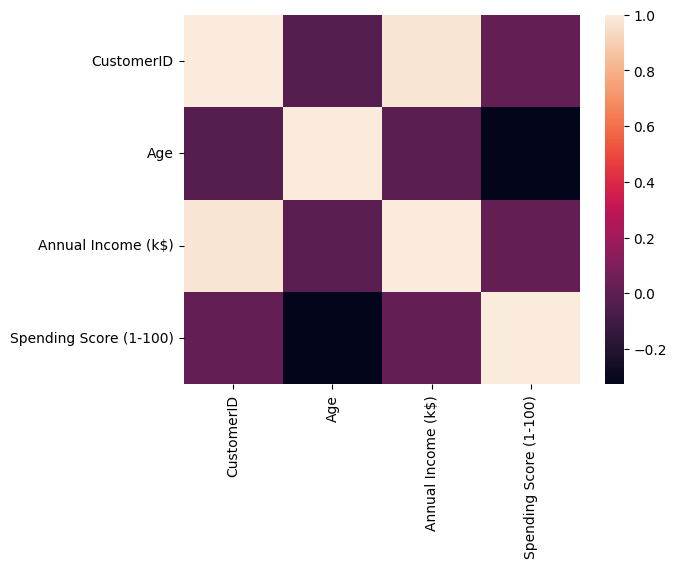

In [16]:
sns.heatmap(df.drop(columns=['Gender']).corr())

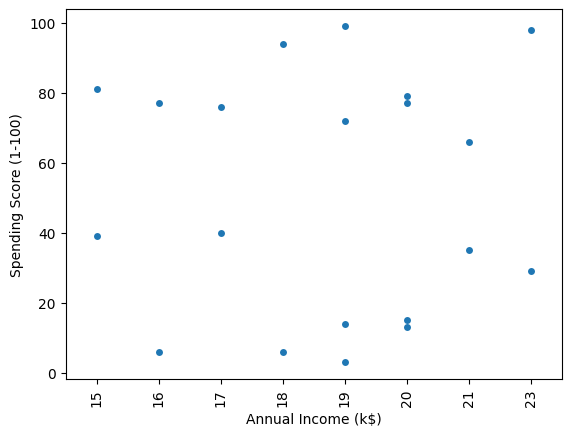

In [17]:
x=df.head(20)
sns.swarmplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=x)
plt.xticks(rotation=90)
plt.show()

In [18]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5)
# Select only numerical features for clustering
numerical_df = df.select_dtypes(include=['number'])
# Fit KMeans to the numerical data
kmeans.fit(numerical_df)
# Get cluster labels for each data point
cluster_labels = kmeans.labels_
# Add cluster labels to the original DataFrame
df['Cluster'] = cluster_labels


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[270425.35999999987, 181710.37575757576, 106772.11461110569, 73962.11798685677, 44644.34116221942, 37466.26262547838, 30470.700453654656, 25203.78796818463, 21975.591466604346, 19832.014863035503]


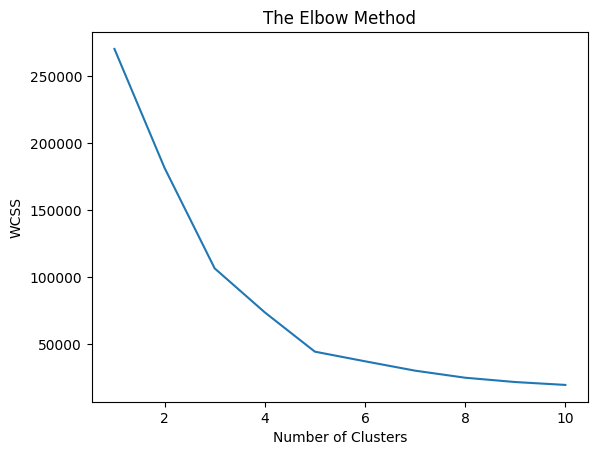

In [25]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
wcss=[] # within cluster sum of square
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(df.drop(["Gender","CustomerID","Age"],axis=1))
    wcss.append(kmeans.inertia_)
print(wcss)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


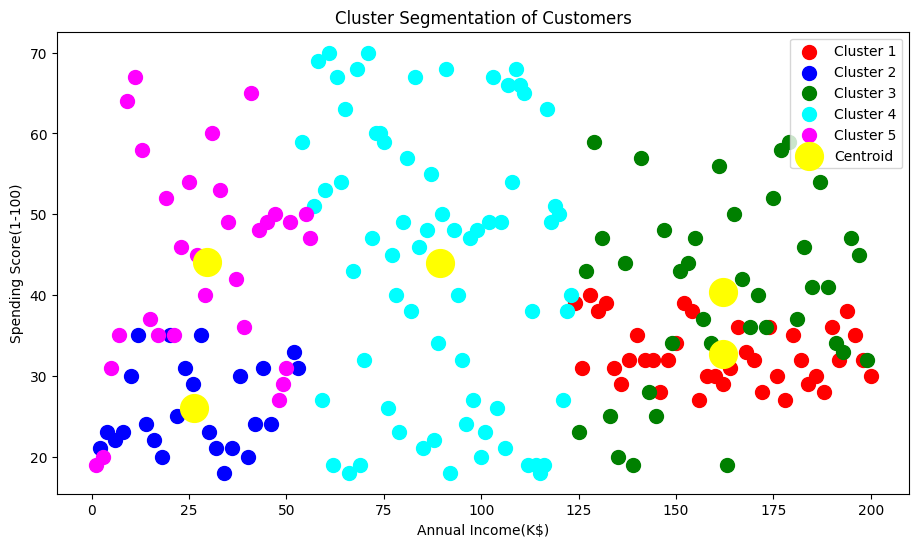

In [22]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
numerical_df = df.select_dtypes(include=['number'])
y_kmeans=kmeans.fit_predict(numerical_df)

#plotting the the clusters
fig,ax = plt.subplots(figsize=(11,6))


cluster_0 = numerical_df[y_kmeans == 0]

ax.scatter(cluster_0.iloc[:, 0], cluster_0.iloc[:, 1], s=100, c='red', label='Cluster 1')


cluster_1 = numerical_df[y_kmeans == 1]
ax.scatter(cluster_1.iloc[:, 0], cluster_1.iloc[:, 1], s=100, c='blue', label='Cluster 2')

cluster_2 = numerical_df[y_kmeans == 2]
ax.scatter(cluster_2.iloc[:, 0], cluster_2.iloc[:, 1], s=100, c='green', label='Cluster 3')

cluster_3 = numerical_df[y_kmeans == 3]
ax.scatter(cluster_3.iloc[:, 0], cluster_3.iloc[:, 1], s=100, c='cyan', label='Cluster 4')

cluster_4 = numerical_df[y_kmeans == 4]
ax.scatter(cluster_4.iloc[:, 0], cluster_4.iloc[:, 1], s=100, c='magenta', label='Cluster 5')

ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=400,c='yellow',label='Centroid')
plt.title('Cluster Segmentation of Customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


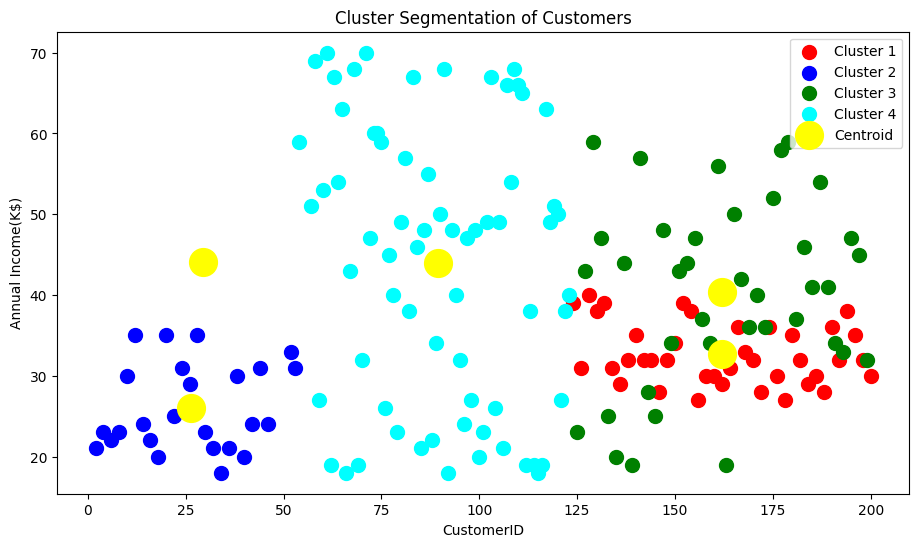

In [24]:
kmeans=KMeans(n_clusters=5,init= 'k-means++', random_state=0)
numerical_df=df.select_dtypes(include=['number'])
y_kmeans=kmeans.fit_predict(numerical_df)

fig,ax=plt.subplots(figsize=(11,6))

cluster_0=numerical_df[y_kmeans==0]
ax.scatter(cluster_0.iloc[:,0],cluster_0.iloc[:,1],s=100,c='red',label='Cluster 1')

cluster_1=numerical_df[y_kmeans==1]
ax.scatter(cluster_1.iloc[:,0],cluster_1.iloc[:,1],s=100,c='blue',label='Cluster 2')

cluster_2=numerical_df[y_kmeans==2]
ax.scatter(cluster_2.iloc[:,0],cluster_2.iloc[:,1],s=100,c='green',label='Cluster 3')

cluster_3=numerical_df[y_kmeans==3]
ax.scatter(cluster_3.iloc[:,0],cluster_3.iloc[:,1],s=100,c='cyan',label='Cluster 4')

ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=400,c='yellow',label='Centroid')
plt.title('Cluster Segmentation of Customers')
plt.xlabel('CustomerID')
plt.ylabel('Annual Income(K$)')
plt.legend()
plt.show()